<a href="https://colab.research.google.com/github/gratusrichard/text-recognition/blob/main/simple_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'2.14.0'

In [5]:
import tensorflow as tf
tf.__version__

from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [7]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


(60000, 28, 28)
(10000, 28, 28)


In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 14s 5ms/step - loss: 0.2038 - accuracy: 0.9360 - val_loss: 0.0706 - val_accuracy: 0.9788
Epoch 2/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0564 - accuracy: 0.9821 - val_loss: 0.0559 - val_accuracy: 0.9825
Epoch 3/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0435 - val_accuracy: 0.9877
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0448 - val_accuracy: 0.9861
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0412 - val_accuracy: 0.9883


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0319 - accuracy: 0.9902
Test accuracy: 0.9901999831199646


In [13]:
(_, _), (test_images, test_labels) = mnist.load_data()
sample_image = test_images[4]
sample_label = test_labels[4]

In [14]:
import numpy as np
sample_image = sample_image.reshape((28, 28, 1)).astype('float32') / 255
sample_image = np.expand_dims(sample_image, axis=0)

1/1 [==============================] - 0s 235ms/step


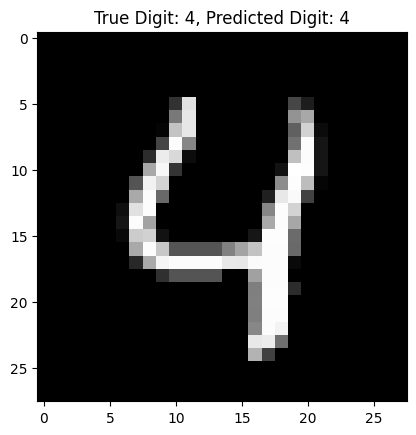

In [15]:
import matplotlib.pyplot as plt

predictions = model.predict(sample_image)

predicted_digit = np.argmax(predictions)

plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f'True Digit: {sample_label}, Predicted Digit: {predicted_digit}')
plt.show()